In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
train = pd.read_pickle('data/train_tree_data_06_v2.pkl')
train.shape

(1429, 429)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1459
Columns: 429 entries, LotFrontage to bin_mo_sold_[9, 13)
dtypes: float64(2), int64(16), uint8(411)
memory usage: 785.7 KB


In [4]:
y = train['SalePrice']

In [5]:
X = train.drop('SalePrice', axis =1)
X.shape

(1429, 428)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50],
    'max_features': [100, 150, 200, 250],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [150, 200, 250],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  9.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [9]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 150,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 300}

In [10]:
best_grid = grid_search.best_estimator_

In [11]:
y_hat = best_grid.predict(X_test)

In [12]:
r2_score(y_test, y_hat)

0.7589461300507538

In [13]:
y_hat_train = best_grid.predict(X_train)

In [14]:
# y_pred = model.predict(X_test)

In [15]:
# r2_score(y_test, y_pred)

In [16]:
print( 'MSE: {0}, RMSE: {1}'.format(mean_squared_error(y_test, y_hat), np.sqrt(mean_squared_error(y_test, y_hat))))

MSE: 1012873988.1714919, RMSE: 31825.681267986893


In [17]:
errors = abs(y_hat - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 22604.9117 degrees.
Accuracy = 86.34%.


In [18]:

residual_train = y_hat_train - y_train
residual_test = y_hat - y_test 

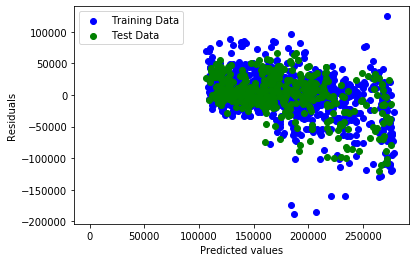

In [19]:
plt.scatter(y_hat_train, residual_train, label ="Training Data", marker='o', color='blue')
plt.scatter(y_hat, residual_test, label ="Test Data", marker='o', color='green')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

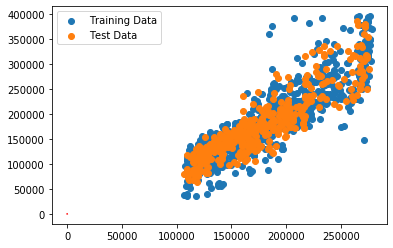

In [20]:
plt.scatter(y_hat_train, y_train, label='Training Data')
plt.scatter(y_hat, y_test, label='Test Data')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.legend()
plt.show()

## Validation on Test Data

In [21]:
test = pd.read_pickle('data/test_tree_data_06_v1.pkl')
test.shape

(1459, 429)

In [22]:
Id = test['Id']
X = test.drop('Id', axis =1)
X.shape

(1459, 428)

In [23]:
pd.DataFrame(X.isnull().sum().sort_values(ascending=False))

,0
"bin_mo_sold_[9, 13)",0
OverallCond_1,0
OverallCond_3,0
OverallCond_4,0
OverallCond_5,0
...,...
KitchenAbvGr_3,0
KitchenQual_Po,0
KitchenQual_Fa,0
KitchenQual_TA,0


In [24]:
y_hat_test = best_grid.predict(X)

In [25]:
submission = pd.DataFrame({'Id': Id, 
             'SalePrice': y_hat_test})
submission.head()

,Id,SalePrice
0,1461,132167.330838
1,1462,153632.798855
2,1463,181092.803649
3,1464,186457.675376
4,1465,188495.813634


In [26]:
submission.to_csv('data/ah_submission_9.csv', index=False)